In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [132]:
import matplotlib.pylab as pylab

params = {'axes.labelsize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'legend.fontsize': 'large',
          #'font.size': 16,
          'axes.titlesize': 'x-large'}
pylab.rcParams.update(params)

In [133]:
DAYS = 2
PERIOD = 24*DAYS
START = 0
PPOD_DIR = '20 bin PPO 500 results' + '/'
SOC_COL = 25

In [134]:
baseline_a = np.genfromtxt(PPOD_DIR+'rebaseline a.csv', delimiter=',')

In [135]:
baseline_soc = np.genfromtxt(r'20 bin PPO 500 results\rebaseline obs.csv', delimiter=',',usecols=SOC_COL)

In [136]:
df_discrete = pd.DataFrame({'Clean_Discrete_Actions':baseline_a,'Clean_Discrete_SoC':baseline_soc})

In [137]:
actions_to_SoC = np.linspace(-1.0,1.0,20)
df_discrete['Clean_Discrete_Actions'].replace(dict(enumerate(actions_to_SoC)),inplace=True)

<Axes: title={'center': 'Discrete Actions and SoC'}, xlabel='Hour', ylabel='Proportion of Storage'>

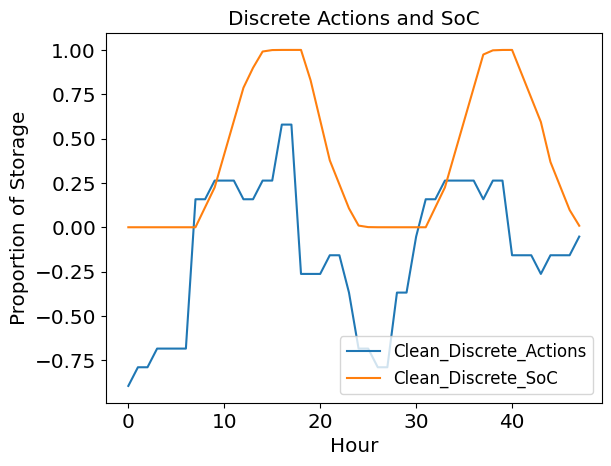

In [138]:
df_discrete.iloc[START:START+PERIOD].plot.line(title='Discrete Actions and SoC',
                                      xlabel='Hour',
                                      ylabel='Proportion of Storage')

Actions specify how a proportion of capacity to chare or discharge. We see that sequential actions of 0.25 increase the SoC by 0.25 at each time step (around step 10).

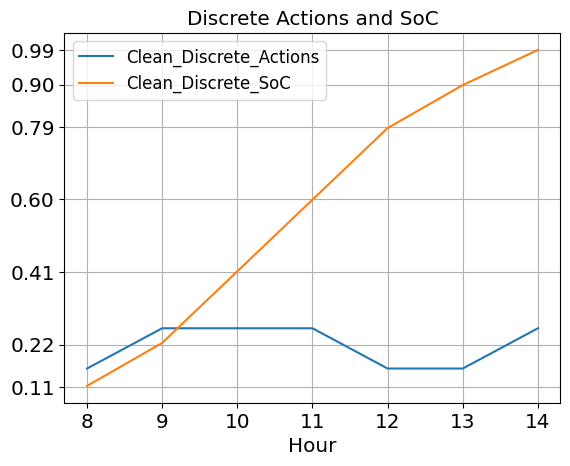

In [139]:
start = 8
end = 15
ax = df_discrete.iloc[start:end].plot.line(title='Discrete Actions and SoC',
                                           xlabel='Hour')
#ax.set_yticks(np.linspace(df.iloc[start:end].min().min(),df.iloc[start:end].max().max(),8))
ax.set_yticks(df_discrete['Clean_Discrete_SoC'].iloc[start:end].round(2))
ax.set_xticks(np.arange(start, end, 1.0))
plt.grid()

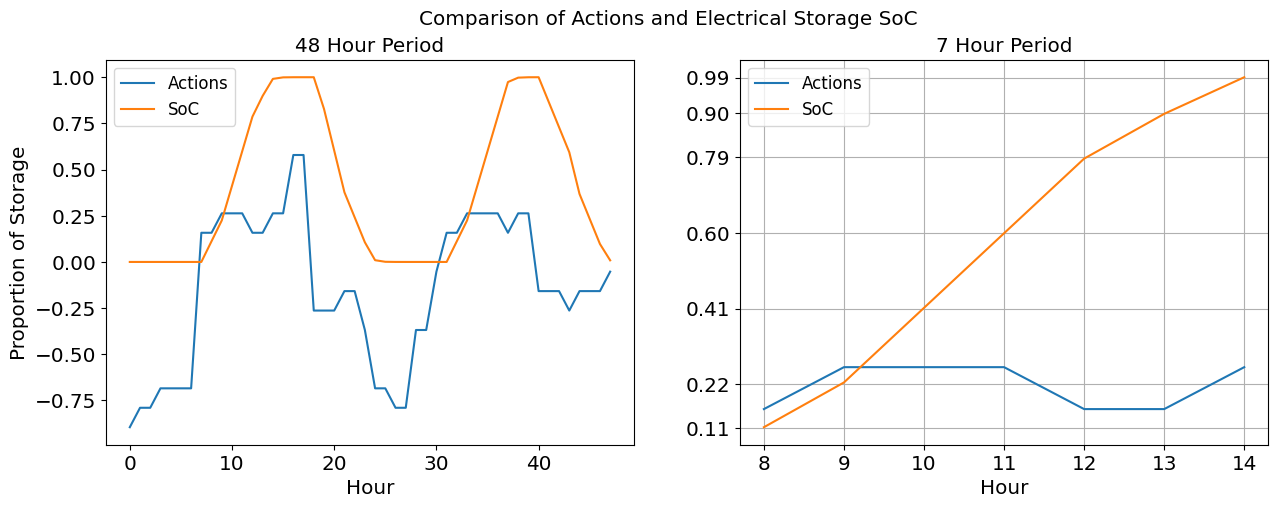

In [140]:
row = 1
col = 2
start = 8
end = 15
names = ['Actions','SoC']
fig = plt.figure(figsize=[15,5],)
fig.suptitle('Comparison of Actions and Electrical Storage SoC',
             fontsize='x-large')

plt.subplot(row,col,1)
ax = df_discrete.iloc[START:START+PERIOD].plot.line(title='48 Hour Period',
                                      xlabel='Hour',
                                      ylabel='Proportion of Storage',
                                      ax=plt.gca())
ax.legend(names)

plt.subplot(row,col,2)
ax = df_discrete.iloc[start:end].plot.line(title='7 Hour Period',
                                           xlabel='Hour',
                                           ax=plt.gca())
ax.set_yticks(df_discrete['Clean_Discrete_SoC'].iloc[start:end].round(2))
ax.set_xticks(np.arange(start, end, 1.0))
ax.legend(names)
plt.grid()

- Here we see that the action is the slope of the SoC (doesn't match exactly, is that from my mapping?). 
- NB that the action only affects the SoC for the following ts.
- knowing that the actions correspond to the SoC slope, an attacker can infer the victim's action space by observing the number of unique slopes.

In [141]:
df_cont = pd.read_csv(r'default SAC 500 norm space results\baseline_obs-a.csv',
                      usecols=['electrical_storage_soc','actions'])

Map actions [0,1] -> [-1,1]

In [142]:
df_cont['actions'] = 2*df_cont['actions'] - 1

<Axes: title={'center': 'Discrete Actions and SoC'}, xlabel='Time (hours)', ylabel='Proportion of Storage'>

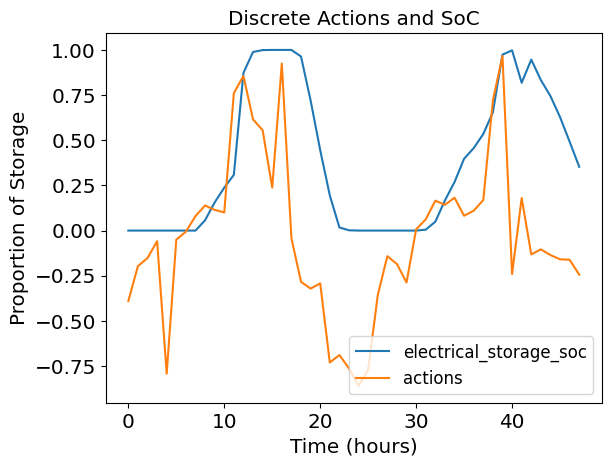

In [143]:
df_cont.iloc[START:START+PERIOD].plot.line(title='Discrete Actions and SoC',
                                      xlabel='Time (hours)',
                                      ylabel='Proportion of Storage')

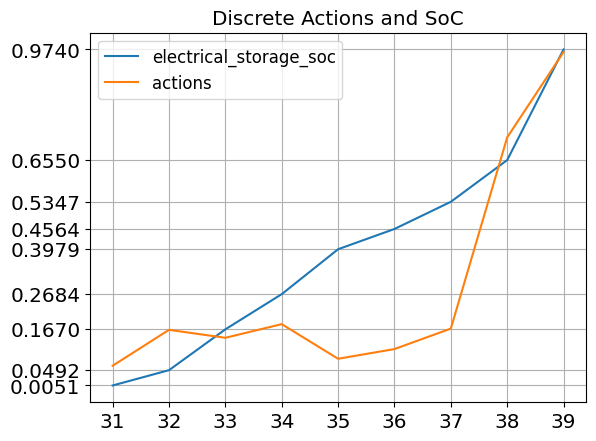

In [144]:
start = 31
end = 40
ax = df_cont.iloc[start:end].plot.line(title='Discrete Actions and SoC',)
#ax.set_yticks(np.linspace(df.iloc[start:end].min().min(),df.iloc[start:end].max().max(),8))
ax.set_yticks(df_cont['electrical_storage_soc'].iloc[start:end])
ax.set_xticks(np.arange(start, end, 1.0))
plt.grid()